## Criação do dataset

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random as rand

df = pd.read_csv('dados/house-price.csv', index_col=None)
df

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
915,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
916,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
917,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
918,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


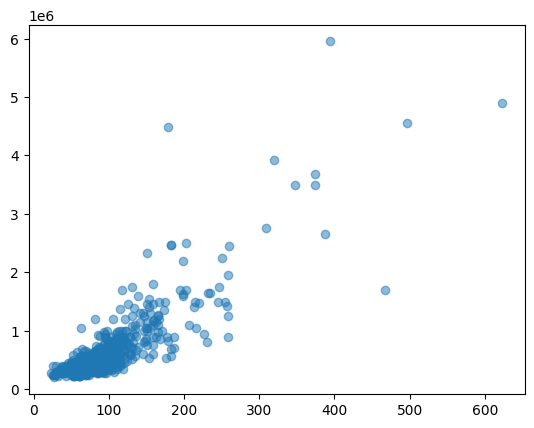

In [3]:
X_train = df['Area'][:500]
y_train = df['Price'][:500]

plt.scatter(x=X_train, y=y_train, alpha=0.5)
plt.show()

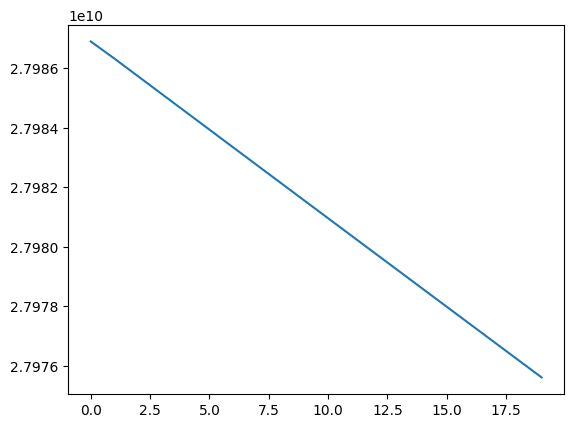

In [4]:
# Learning Rate
lr = 0.001
# Weight
w = rand.random()
# Bias
b = 0
# MSE (Cost Function)
mse = []
N = len(X_train)

# 20 épocas
for i in range(20):
    for j in range(500):
        # Predição do modelo
        pred = (X_train[j] * w) + b
        # Erro calculado
        error = pred - y_train[j]

        # Calculos das derivadas
        dw  = (1 / N) * X_train[j] * error
        db = (1 / N) * error

        # Atualização dos parâmetros
        w = w - lr * dw
        b = b - lr * db
    # Lista para fazer o gráfico da função de custo
    mse.append(error ** 2)

plt.plot(mse)
plt.show()

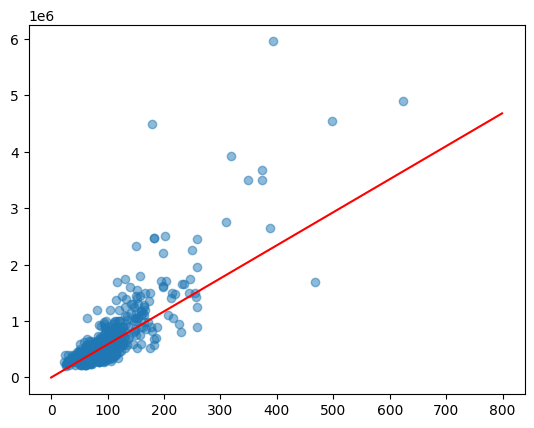

In [5]:
regression_line = [(x * w + b) for x in range(800)]

plt.scatter(x=X_train, y=y_train,  alpha=0.5)
plt.plot(regression_line, color='red')
plt.show()

In [27]:
display(df[['Area', 'Price']][910:920])

,Area,Price
910,111,849000.0
911,108,539000.0
912,59,525000.0
913,194,1500000.0
914,41,295000.0
915,117,750000.0
916,72,350000.0
917,51,350000.0
918,113,599000.0
919,79,300000.0


In [29]:
area = int(input('Area: '))
print('preço médio:', int(108 * w + b))

preço médio: 631739
